In [6]:
import tensorflow as tf
import matplotlib.pyplot as plt

batch_size = 100
epochs = 1000
z_dim = 20

# Noise for visualization
z_vis = tf.random.normal([10, z_dim])

# Load data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train / 255.0
x_iter = iter(tf.data.Dataset.from_tensor_slices(x_train).shuffle(4 * batch_size).batch(batch_size).repeat())

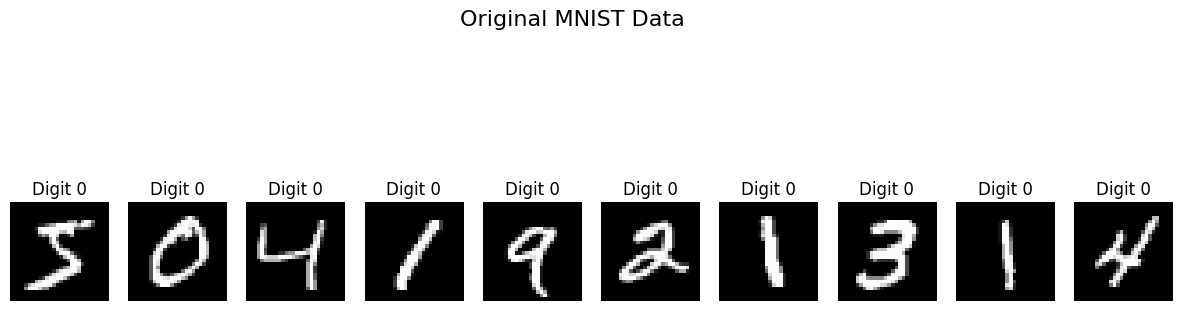

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Plot original MNIST data
num_samples = 10  # Number of images to display
fig, axes = plt.subplots(1, num_samples, figsize=(15, 5))

# Display the first `num_samples` images from x_train
for i in range(num_samples):
    axes[i].imshow(x_train[i], cmap='gray')
    axes[i].axis('off')
    axes[i].set_title(f"Digit {np.argmax(y_train[i])}")  # Optional: add labels

plt.suptitle("Original MNIST Data", fontsize=16)
plt.show()


In [7]:
# Generator
G = tf.keras.models.Sequential([
  tf.keras.layers.Dense(28*28 // 2, input_shape = (z_dim,), activation='relu'),
  tf.keras.layers.Dense(28*28, activation='sigmoid'),
  tf.keras.layers.Reshape((28, 28))])

# Discriminator
D = tf.keras.models.Sequential([
 tf.keras.layers.Flatten(input_shape=(28, 28)),
 tf.keras.layers.Dense(28*28 // 2, activation='relu'),
 tf.keras.layers.Dense(1)])


In [8]:
# Loss functions
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits = True)
def G_loss(D, x_fake):
  return cross_entropy(tf.ones_like(D(x_fake)), D(x_fake))
def D_loss(D, x_real, x_fake):
  return cross_entropy(tf.ones_like(D(x_real)), D(x_real)) + cross_entropy(tf.zeros_like(D(x_fake)), D(x_fake))

# Optimizers
G_opt = tf.keras.optimizers.Adam(1e-4)
D_opt = tf.keras.optimizers.Adam(1e-4)



epoch: 1; G_loss: 2.858214; D_loss: 0.097611


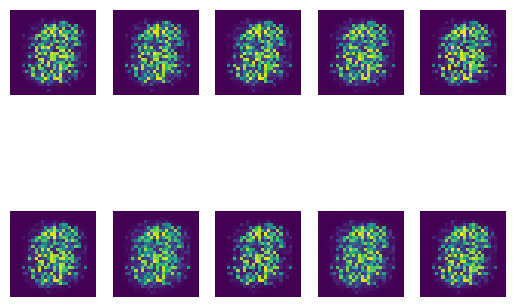

epoch: 101; G_loss: 3.024691; D_loss: 0.113920


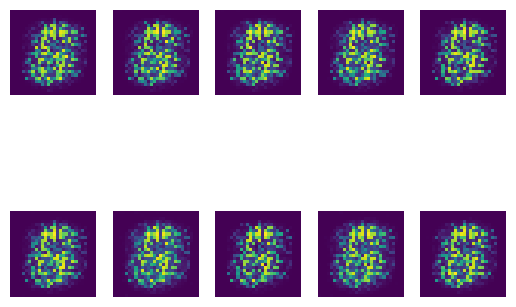

epoch: 201; G_loss: 2.893788; D_loss: 0.104839


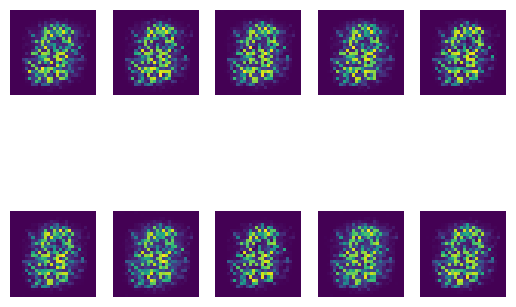

epoch: 301; G_loss: 2.737836; D_loss: 0.160861


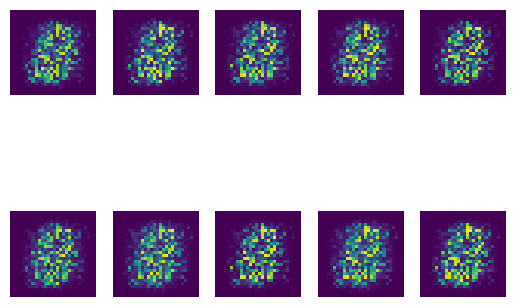

epoch: 401; G_loss: 2.797735; D_loss: 0.125107


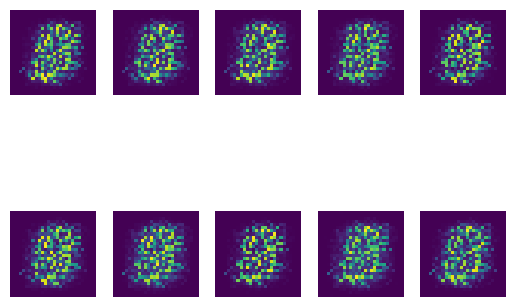

epoch: 501; G_loss: 2.607326; D_loss: 0.141599


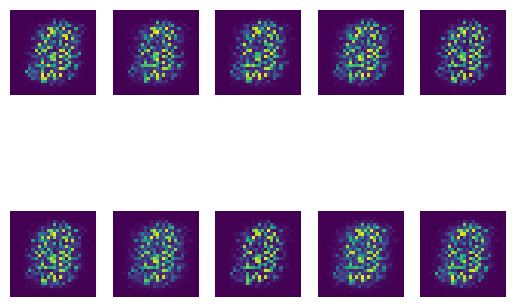

epoch: 601; G_loss: 2.529474; D_loss: 0.147049


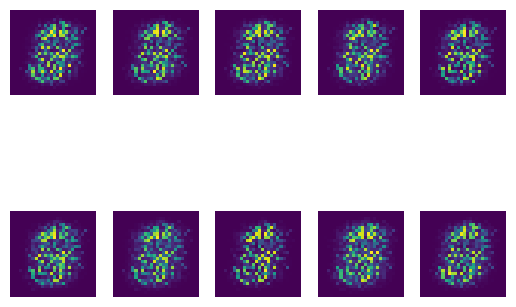

epoch: 701; G_loss: 2.647146; D_loss: 0.134996


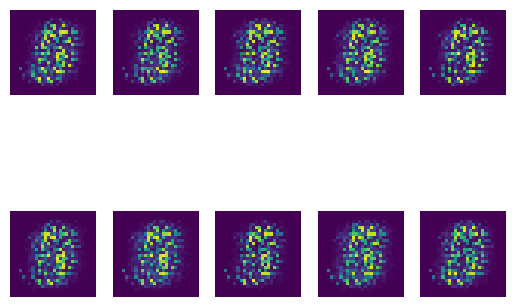

epoch: 801; G_loss: 2.458298; D_loss: 0.156499


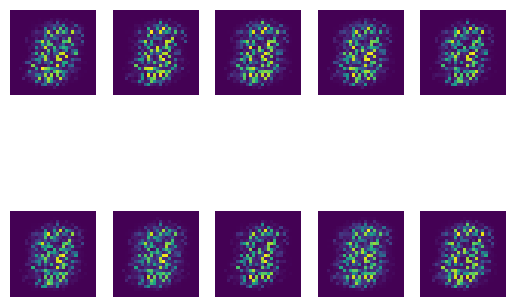

epoch: 901; G_loss: 2.477762; D_loss: 0.179431


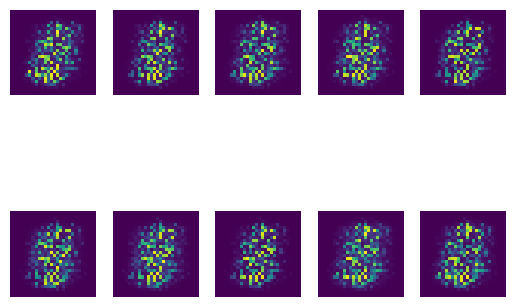

In [13]:
# Train
for epoch in range(epochs):
  z_mb = tf.random.normal([batch_size, z_dim])
  x_real = next(x_iter)
  # Record operations
  with tf.GradientTape() as G_tape, tf.GradientTape() as D_tape:
    x_fake = G(z_mb)
    G_loss_curr = G_loss(D, x_fake)
    D_loss_curr = D_loss(D, x_real, x_fake)
  # Gradients
  G_grad = G_tape.gradient(G_loss_curr, G.trainable_variables)
  D_grad = D_tape.gradient(D_loss_curr, D.trainable_variables)
  # Apply gradients
  G_opt.apply_gradients(zip(G_grad, G.trainable_variables))
  D_opt.apply_gradients(zip(D_grad, D.trainable_variables))

  if epoch % 100 == 0:
    # Print results
    print('epoch: {}; G_loss: {:.6f}; D_loss: {:.6f}'.format(epoch+1, G_loss_curr, D_loss_curr))
    # Plot generated images
    for i in range(10):
      plt.subplot(2, 5, i+1)
      plt.imshow(G(z_vis)[i,:,:]*255.0)
      plt.axis('off')
    plt.show()